In [50]:
import os
from pathlib import Path
import shutil as sh

In [11]:
siberian_stock = '/Users/jamesgardner/Desktop/ConvolutionalNN/Siberian_multi'
scottish_stock = '/Users/jamesgardner/Desktop/ConvolutionalNN/Scottish_multi'
persion_stock = '/Users/jamesgardner/Desktop/ConvolutionalNN/Persian_multi'

In [15]:
base_directory_multi = '/Users/jamesgardner/Desktop/ConvolutionalNN/Splts_multi'
os.mkdir(base_directory_multi)


In [16]:
# train directory
train_multi = os.path.join(base_directory,'train')
os.mkdir(train)

# val directory
val_multi = os.path.join(base_directory,'validation')
os.mkdir(val)

# test directory
test_multi = os.path.join(base_directory,'test')
os.mkdir(test)



In [17]:
# directory for scottish cat breed

# train directories
train_scottish_m = os.path.join(train_multi,'SF')
os.mkdir(train_scottish_m)

train_siberian_m = os.path.join(train_multi, 'SB')
os.mkdir(train_siberian_m)

train_persian_m = os.path.join(train_multi, 'P')
os.mkdir(train_persian_m)


# val directories
val_scottish_m = os.path.join(val_multi,'SF')
os.mkdir(val_scottish_m)

val_siberian_m = os.path.join(val_multi,'SB')
os.mkdir(val_siberian_m)

val_persian_m = os.path.join(val_multi, 'P')
os.mkdir(val_persian_m)


# test directories
test_scottish_m = os.path.join(test_multi,'SF')
os.mkdir(test_scottish_m)

test_siberian_m = os.path.join(test_multi,'SB')
os.mkdir(test_siberian_m)

test_persian_m = os.path.join(test_multi, 'P')
os.mkdir(test_persian_m)

In [19]:
# Copy first 500 siberian images to train directory
parent_list = os.listdir(siberian_stock)
count=0
for child in parent_list:
    if count<1200:
        
        # /Users/jamesgardner/Desktop/ConvolutionalNN/Siberian/siberian0.jpg
        src = os.path.join(siberian_stock, child)
        dst = os.path.join(train_siberian_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1    

# Copy next 250 siberian images to val directory
parent_list = os.listdir(siberian_stock)
count=0
for child in parent_list:
    if count<1200:
        pass
    elif count >= 1200 and count <1600:
        src = os.path.join(siberian_stock, child)
        dst = os.path.join(val_siberian_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1   
# Copy next 250 siberian images to test directory
parent_list = os.listdir(siberian_stock)
count=0
for child in parent_list:
    if count<1600:
        pass
    elif count >= 1600 and count <2000:
        src = os.path.join(siberian_stock, child)
        dst = os.path.join(test_siberian_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1   

#------------------------------------------------------------------------------------------------------#
    
# Copy first 500 scottish fold images
parent_list = os.listdir(scottish_stock)
count=0
for child in parent_list:
    if count<1200:
        src = os.path.join(scottish_stock, child)
        dst = os.path.join(train_scottish_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1   
# Copy next 250 scottish fold images to val directory
parent_list = os.listdir(scottish_stock)
count=0
for child in parent_list:
    if count<1200:
        pass
    elif count >= 1200 and count <1600:
        src = os.path.join(scottish_stock, child)
        dst = os.path.join(val_scottish_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1  
# Copy next 250 scottish fold images to test directory 
parent_list = os.listdir(scottish_stock)
count=0
for child in parent_list:
    if count<1600:
        pass
    elif count >= 1600 and count <2000:
        src = os.path.join(scottish_stock, child)
        dst = os.path.join(test_scottish_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1
    
#-------------------------------------------------------------------------------#
    
    # Copy first 500 scottish fold images
parent_list = os.listdir(persion_stock)
count=0
for child in parent_list:
    if count<1200:
        src = os.path.join(persion_stock, child)
        dst = os.path.join(train_persian_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1   
# Copy next 250 scottish fold images to val directory
parent_list = os.listdir(persion_stock)
count=0
for child in parent_list:
    if count<1200:
        pass
    elif count >= 1200 and count <1600:
        src = os.path.join(persion_stock, child)
        dst = os.path.join(val_persian_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1  
# Copy next 250 scottish fold images to test directory 
parent_list = os.listdir(persion_stock)
count=0
for child in parent_list:
    if count<1600:
        pass
    elif count >= 1600 and count <2000:
        src = os.path.join(persion_stock, child)
        dst = os.path.join(test_persian_m, child)
        sh.copyfile(src, dst)
    else:
        break
    count += 1

In [20]:
import keras
keras.__version__
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [24]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
# add to shape = (sample_count,however many classes)
# change class_mode to 'catergorical'
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)
    
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    
    
    return features, labels, generator

train_features, train_labels,generator_train = extract_features(train,3600)
validation_features, validation_labels,generator_val = extract_features(val, 1200)
test_features, test_labels,generator_test = extract_features(test, 1200)


Found 3600 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [26]:
train_features = np.reshape(train_features, (3600, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1200, 4 * 4 * 512))
test_features = np.reshape(test_features, (1200, 4 * 4 * 512))

In [29]:
# activation to softmax
# loss to catergorical cross entropy 
from keras import models
from keras import layers
from keras import optimizers

model_5 = models.Sequential()
model_5.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(1, activation='sigmoid'))
# change units to number of classes 
model_5.add(layers.Dense(units=3,activation="softmax"))

# for loss use 'catergorical_crossentropy'
model_5.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model_5.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
180/180 [==============================] - 2s 10ms/step - loss: 1.1197 - acc: 0.3243 - val_loss: 1.0818 - val_acc: 0.3333
Epoch 2/100
180/180 [==============================] - 2s 9ms/step - loss: 1.0846 - acc: 0.3324 - val_loss: 1.0663 - val_acc: 0.3333
Epoch 3/100
180/180 [==============================] - 2s 9ms/step - loss: 1.0688 - acc: 0.3356 - val_loss: 1.0596 - val_acc: 0.3375
Epoch 4/100
180/180 [==============================] - 2s 9ms/step - loss: 1.0566 - acc: 0.3544 - val_loss: 1.0557 - val_acc: 0.3725
Epoch 5/100
180/180 [==============================] - 2s 9ms/step - loss: 1.0518 - acc: 0.3833 - val_loss: 1.0524 - val_acc: 0.3800
Epoch 6/100
180/180 [==============================] - 2s 9ms/step - loss: 1.0509 - acc: 0.3844 - val_loss: 1.0498 - val_acc: 0.4033
Epoch 7/100
180/180 [==============================] - 2s 9ms/step - loss: 1.0437 - acc: 0.4026 - val_loss: 1.0483 - val_acc: 0.3942
Epoch 8/100
180/180 [==============================] - 2s 9ms/step -

180/180 [==============================] - 2s 9ms/step - loss: 0.9201 - acc: 0.6437 - val_loss: 1.0088 - val_acc: 0.5017
Epoch 63/100
180/180 [==============================] - 2s 9ms/step - loss: 0.9206 - acc: 0.6198 - val_loss: 1.0060 - val_acc: 0.5133
Epoch 64/100
180/180 [==============================] - 2s 9ms/step - loss: 0.9233 - acc: 0.6289 - val_loss: 1.0082 - val_acc: 0.5033
Epoch 65/100
180/180 [==============================] - 2s 9ms/step - loss: 0.9151 - acc: 0.6437 - val_loss: 1.0054 - val_acc: 0.5108
Epoch 66/100
180/180 [==============================] - 2s 9ms/step - loss: 0.9099 - acc: 0.6549 - val_loss: 1.0039 - val_acc: 0.5158
Epoch 67/100
180/180 [==============================] - 2s 9ms/step - loss: 0.9106 - acc: 0.6453 - val_loss: 1.0033 - val_acc: 0.5208
Epoch 68/100
180/180 [==============================] - 2s 9ms/step - loss: 0.9138 - acc: 0.6379 - val_loss: 1.0044 - val_acc: 0.5058
Epoch 69/100
180/180 [==============================] - 2s 9ms/step - loss:

In [30]:
accuracy = model_5.evaluate(x=validation_features,y=validation_labels,batch_size=32)
print("Accuracy: ", accuracy[1])

38/38 [==============================] - 0s 2ms/step - loss: 0.9885 - acc: 0.5183
Accuracy:  0.5183333158493042


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [45]:
import matplotlib.pylab as plt
import pandas as pd 
import seaborn as sb

In [46]:
results_dic = {"CNNBaseline":[.81],"CNNW/Transfer":[.9000],"CNN/Transfer/ImgAug":[.52],"CNN/Transfer/Multi":[.51]}

In [47]:
Results = pd.DataFrame(results_dic, )

In [48]:
Results

,CNNBaseline,CNNW/Transfer,CNN/Transfer/ImgAug,CNN/Transfer/Multi
0,0.81,0.9,0.52,0.51


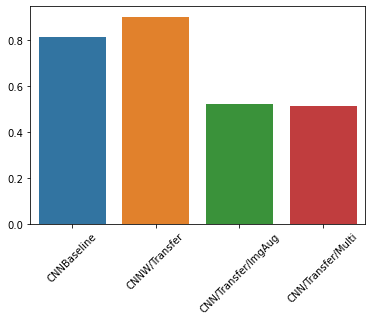

In [49]:
ax = sb.barplot(data=Results)
plt.xticks(rotation=45)
plt.show()